# **MÓDULO 34 - AULA 2**
# Aplicando a Regressão Polinomial

Uma vez que aprendemos mais sobre a regressão polinomial é hora de aplicarmos ela ao python com a biblioteca scikit-learn.

Iremos aplicar a regressão polinomial na mesma base de dados que usaram na regressão linear permitindo que vejam como o modelo pode capturar melhor a relação entre as variáveis, especialmente se os preços dos imóveis não seguem uma tendência linear.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

A biblioteca prepocessing importa a classe PolynomialFeatures do módulo preprocessing da biblioteca scikit-learn. PolynomialFeatures é usada para transformar as variáveis de entrada, criando novos recursos que são potências das variáveis originais.

In [ ]:
df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

In [ ]:
df_imoveis

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [ ]:
y = df_imoveis['Valor_Aluguel']

In [ ]:
X = df_imoveis[['Valor_Condominio']]

Nossa primeira etapa é de processar os dados e nós não tinhamos em outros modelos necessariamente essa etapa.

In [ ]:
poly_features = PolynomialFeatures(degree=2)

De forma bem simplificada, essa etapa é como transformar sua variável original para que ela inclua não só os valores normais, mas também esses valores elevados ao quadrado (ou a outras potências, se você escolher um grau maior).

Por exemplo, se você tiver uma variável que representa o tamanho de uma casa, com o PolynomialFeatures(degree=2), você não só vai considerar o tamanho, mas também o tamanho ao quadrado. Isso permite que o modelo ajuste uma curva aos dados, ao invés de uma linha reta, capturando melhor as relações mais complexas.

degree=2: Esse parâmetro especifica o grau do polinômio que você quer gerar. Neste caso, degree=2 significa que o modelo incluirá termos até a segunda potência (quadrados) das variáveis de entrada. Por exemplo, se você tiver uma única variável
x, ela será transformada em duas novas variáveis:
X e X^2
 .

Aplicamos apenas nas variaveis X essa transformação:

In [ ]:
x_poly = poly_features.fit_transform(X)

Essa linha configura a transformação das suas variáveis de entrada para que você possa aplicar a regressão linear em um espaço polinomial de grau 2, permitindo ajustar uma curva aos dados.

In [ ]:
x_poly

array([[1.000000e+00, 2.950000e+02, 8.702500e+04],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 3.700000e+03, 1.369000e+07],
       [1.000000e+00, 6.000000e+03, 3.600000e+07],
       [1.000000e+00, 1.587000e+03, 2.518569e+06]])

Agora podemos seguir o percurso normal:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [ ]:
# Aplicando regressão linear nos dados transformados
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 3)
Tamanho de y_test: (1441,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


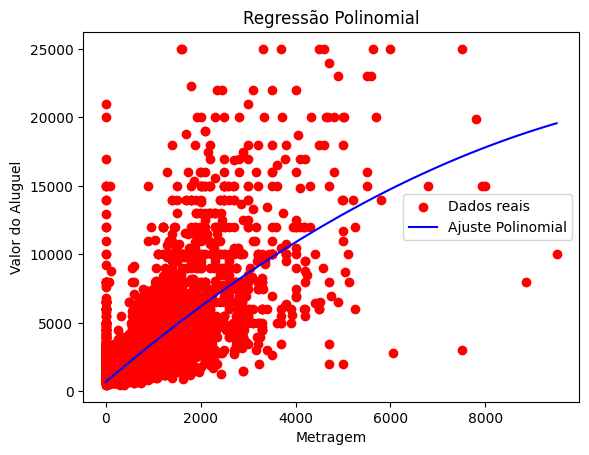

In [ ]:
y_pred = model.predict(x_test)

# CriarEmos uma sequência de valores X para a visualização, buscando a suavização
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

Criar uma faixa de valores para x ao longo do intervalo de dados que você possui, mas com mais pontos para gerar uma linha suave.

**np.linspace(X.min(), X.max(), 100):** Cria 100 valores igualmente espaçados entre o menor e o maior valor de X.

**.reshape(-1, 1):** Transforma o array 1D em um array 2D com uma única coluna, que é necessário para a transformação polinomial e a previsão.

Vamos testar uma regressão linear simples afim de comparar:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = model.predict(x_test)

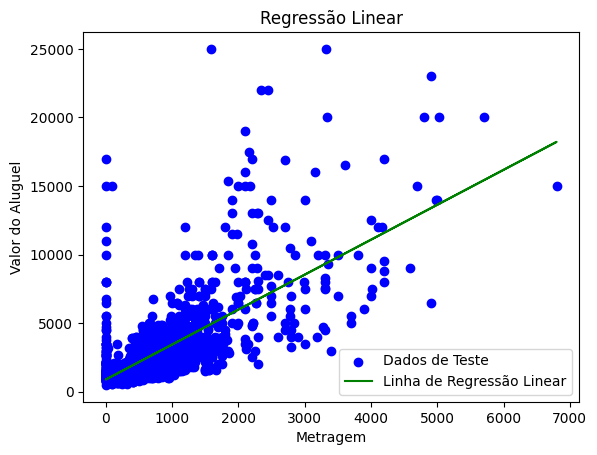

In [ ]:
plt.scatter(x_test, y_test, color='blue', label='Dados de Teste')  # Dados de teste
plt.plot(x_test, y_pred_linear, color='green', label='Linha de Regressão Linear')  # Linha de regressão
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear')
plt.legend()
plt.show()

In [ ]:
r2_linear = r2_score(y_test, y_pred_linear)
print(f'R² da Regressão Linear: {r2_linear:.4f}')

R² da Regressão Linear: 0.4963


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.4921


Ambos os modelos apresentam um R² semelhante, o que sugere que, para essa base de dados específica, a transformação polinomial de grau 2 não trouxe uma melhoria substancial em relação ao modelo linear.Ambos os modelos apresentam um R² semelhante, o que sugere que, para essa base de dados específica, a transformação polinomial de grau 2 não trouxe uma melhoria substancial em relação ao modelo linear.

# **MÓDULO 34 - AULA 4**
# Aplicando a Regressão Lasso, Ridge e Elastic

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Antes de aplicarmos métodos avançados de regularização, como Regressão Ridge, Lasso e Elastic Net, à nossa base de dados de aluguel, é fundamental realizar uma análise inicial para entender melhor nossas variáveis. Um dos passos cruciais nessa etapa é examinar a matriz de correlação.

In [ ]:
df_imoveis.corr(method='pearson')

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


Identificar Multicolinearidade: Se duas ou mais variáveis estão altamente correlacionadas (próximas de 1 ou -1), elas estão colineares. Isso pode causar problemas em modelos de regressão, pois pode levar a estimativas instáveis dos coeficientes e dificultar a interpretação do modelo.

A alta correlação entre "N_suites" e "N_banheiros" indica multicolinearidade, que pode ser tratada com técnicas de regularização

A alta correlação entre variáveis pode ter implicações diferentes dependendo do contexto. Vamos esclarecer a diferença entre alta correlação entre variáveis independentes (features) e a correlação entre variáveis independentes e a variável dependente (target):

**Multicolinearidade:** Quando duas ou mais variáveis independentes estão altamente correlacionadas, isso pode causar problemas de multicolinearidade.
Problemas:

**Estimativas Instáveis:** Modelos de regressão podem gerar coeficientes instáveis e difíceis de interpretar.

**Redundância:** Variáveis correlacionadas podem fornecer informações redundantes, o que pode levar a um ajuste excessivo do modelo.

**Dificuldade na Interpretação:** Quando variáveis são altamente correlacionadas, pode ser difícil determinar a contribuição individual de cada variável para a previsão.

# Já a alta correlação entre as váriaveis indedpendetes e a target é positivo para nosso modelo!!

**MODELO REGRESSÃO RIDGE:**

In [ ]:
# Criando e treinando o modelo Ridge:
ridge_model = Ridge(alpha=0.1)  # Alpha é o parâmetro de regularização, testar: 1.0/ 100 /0.01
ridge_model.fit(x_train, y_train)

y_pred_ridge = ridge_model.predict(x_test)

# Avaliando o modelo
print("Ridge Regressão")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

Ridge Regressão
R^2 Score: 0.49629320029401913
Mean Squared Error: 4668978.564206829


Alpha é um parâmetro que controla a força da penalização na regularização. Em termos simples, ele determina o quanto queremos penalizar a complexidade do nosso modelo. O objetivo da regularização é evitar o ajuste excessivo (overfitting) do modelo, o que pode ocorrer quando o modelo se torna muito complexo e se ajusta demais aos dados de treinamento.


**Alpha Baixo: Menos penalização, o modelo pode ajustar mais aos dados de treinamento (maior risco de overfitting).**


**Alpha Alto: Mais penalização, o modelo se torna mais simples e pode ter um desempenho melhor em dados não vistos (reduz o risco de overfitting).**

In [ ]:
# Criando e treinando o modelo Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

y_pred_lasso = lasso_model.predict(x_test)

# Avaliando o modelo
print("Lasso Regressão")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

Lasso Regressão
R^2 Score: 0.4962931739207457
Mean Squared Error: 4668978.808666997


In [ ]:
# Criando e treinando o modelo Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Alpha e l1_ratio são parâmetros de regularização
elastic_net_model.fit(x_train, y_train)

# Fazendo previsões
y_pred_elastic_net = elastic_net_model.predict(x_test)

# Avaliando o modelo
print("Elastic Net Regressão")
print("R^2 Score:", r2_score(y_test, y_pred_elastic_net))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_elastic_net))

Elastic Net Regressão
R^2 Score: 0.49629315255716755
Mean Squared Error: 4668979.006691102


O R² Score mede a proporção da variância da variável dependente que é explicada pelo modelo. Em outras palavras, ele indica quão bem o modelo se ajusta aos dados.

O MSE mede a média dos quadrados das diferenças entre os valores reais e os valores previstos pelo modelo. Ele quantifica o erro médio ao quadrado, penalizando erros maiores mais fortemente.

Se o modelo subjacente (por exemplo, regressão linear) já é simples e não está sobreajustado (overfitting), a regularização pode não mostrar uma melhoria significativa.